In [1]:
#DATA importing and Cleaning
import pandas as pd
import os

#Opening and concatening the files for females and males folders
female = pd.DataFrame()
indir = '/Users/TarjaniAgrawal/Desktop/Springboard/Capstone I_data/Female data'
for root, dirs, filenames in os.walk(indir):
    for f in filenames:
        x = pd.DataFrame.from_csv(indir + '/' + f, index_col= None, sep='\t')
        female = pd.concat([female, x], ignore_index=True)
male = pd.DataFrame()
male.tail()
indir = '/Users/TarjaniAgrawal/Desktop/Springboard/Capstone I_data/Male data'
for root, dirs, filenames in os.walk(indir):
    for f in filenames:
        x = pd.DataFrame.from_csv(indir + '/' + f, index_col= None, sep='\t')
        male = pd.concat([male, x], ignore_index=True)
# Adding Sex column to female and male dataframes
import numpy as np
F = np.array('Female')
female['Sex']= F
M = np.array('Male')
male['Sex']= M
#Concatening male and female columns
df = pd.concat([female, male], ignore_index=True)
#Deleting NOTES column and CODES columns
df = df.drop(['Notes', 'State Code', 'Cancer Sites Code', 'Year Code', 'Age Group Code', 'Race Code'], axis=1)
#Deleting NaN rows
df = df[df.State.notnull()]  
#Checking different types of values in Deaths columns
#df['Deaths'].value_counts()
# Dropping rows with Deaths as Not applicable which mainly has rows for cancer site as female sex organ for males and vice versa
df = df[df['Deaths'] != 'Not Applicable']
# Looking at the different types of values in other columns in case they have any Nan
#cols = ['State', 'Cancer Sites', 'Year', 'Age Group', 'Race', 'Deaths', 'Population', 'Crude Rate', 'Sex']
#for col in cols:
    #x = df[col].value_counts()
    #print(x)

# Dropping the rows with Crude Rate or Population is equal to Not Applicable 
df = df[(df['Crude Rate'] != 'Not Applicable') | (df['Population'] != 'Not Applicable')]
# Taking dataframe without Suppressed values for now. 
df = df[(df['Deaths'] != 'Suppressed') | (df['Crude Rate'] != 'Suppressed')]
df.head()


,State,Cancer Sites,Year,Age Group,Race,Deaths,Population,Crude Rate,Sex
0,Alabama,Oral Cavity and Pharynx,1999.0,< 1 year,American Indian or Alaska Native,0,104,0.0,Female
1,Alabama,Oral Cavity and Pharynx,1999.0,< 1 year,Asian or Pacific Islander,0,245,0.0,Female
2,Alabama,Oral Cavity and Pharynx,1999.0,1-4 years,American Indian or Alaska Native,0,535,0.0,Female
3,Alabama,Oral Cavity and Pharynx,1999.0,1-4 years,Asian or Pacific Islander,0,1193,0.0,Female
4,Alabama,Oral Cavity and Pharynx,1999.0,5-9 years,American Indian or Alaska Native,0,874,0.0,Female


In [2]:
# Looking at the data types of columns 
cols = ['State', 'Cancer Sites', 'Year', 'Age Group', 'Race', 'Deaths', 'Population', 'Crude Rate', 'Sex']
for col in cols:
    x = df[col].dtype
    print(col , x)

State object
Cancer Sites object
Year float64
Age Group object
Race object
Deaths object
Population object
Crude Rate object
Sex object


In [3]:
#Converting datatypes of Deaths, Population and Crude Rate
col_name = ['Deaths', 'Population', 'Crude Rate']
for col in col_name:
    df[col] = pd.to_numeric(df[col])
    t = df[col].dtype
    print(col , t)

Deaths int64
Population int64
Crude Rate float64


In [4]:
#Converting datatypes of year as object
col_name = ['Year']
for col in col_name:
    df[col] = df[col].apply(str)
    t = df[col].dtype
    print(col , t)

Year object


In [5]:
df.head()

,State,Cancer Sites,Year,Age Group,Race,Deaths,Population,Crude Rate,Sex
0,Alabama,Oral Cavity and Pharynx,1999.0,< 1 year,American Indian or Alaska Native,0,104,0.0,Female
1,Alabama,Oral Cavity and Pharynx,1999.0,< 1 year,Asian or Pacific Islander,0,245,0.0,Female
2,Alabama,Oral Cavity and Pharynx,1999.0,1-4 years,American Indian or Alaska Native,0,535,0.0,Female
3,Alabama,Oral Cavity and Pharynx,1999.0,1-4 years,Asian or Pacific Islander,0,1193,0.0,Female
4,Alabama,Oral Cavity and Pharynx,1999.0,5-9 years,American Indian or Alaska Native,0,874,0.0,Female


In [6]:
df.describe()

,Deaths,Population,Crude Rate
count,1.604437e+06,1.604437e+06,1.604437e+06
mean,4.327168e+00,3.115196e+04,7.820038e+00
std,3.174580e+01,8.085297e+04,5.260628e+01
min,0.000000e+00,1.000000e+00,0.000000e+00
25%,0.000000e+00,5.620000e+02,0.000000e+00
50%,0.000000e+00,2.905000e+03,0.000000e+00
75%,0.000000e+00,2.110400e+04,0.000000e+00
max,1.350000e+03,1.143086e+06,2.390400e+03


### Year column is not required for my future analysis as I am not looking at progress of the disease over time but at percentage death for a catergory of people.

In [7]:
# Grouping to see how can we get rid of year column and combine rest of the data
df1=df.groupby(['State','Cancer Sites', 'Age Group', 'Sex', 'Race','Year',])[ 'Deaths', 'Population', 'Crude Rate'].sum()
df1.head()

Deaths  \
State   Cancer Sites     Age Group Sex    Race                             Year             
Alabama Bones and Joints 1-4 years Female American Indian or Alaska Native 1999.0       0   
                                                                           2000.0       0   
                                                                           2001.0       0   
                                                                           2002.0       0   
                                                                           2003.0       0   

                                                                                   Population  \
State   Cancer Sites     Age Group Sex    Race                             Year                 
Alabama Bones and Joints 1-4 years Female American Indian or Alaska Native 1999.0         535   
                                                                           2000.0         633   
                                                                           2001.0         667   
                                                                           2002.0         679   
                                                                           2003.0         692   

                                                                                   Crude Rate  
State   Cancer Sites     Age Group Sex    Race                             Year                
Alabama Bones and Joints 1-4 years Female American Indian or Alaska Native 1999.0         0.0  
                                                                           2000.0         0.0  
                                                                           2001.0         0.0  
                                                                           2002.0         0.0  
                                                                           2003.0         0.0

In [8]:
# sum over the Deaths, Population and Crude Rate for a particular category over all the years.
df2=df.groupby(['State','Cancer Sites', 'Age Group', 'Sex', 'Race'], as_index=False)[ 'Deaths', 'Population', 'Crude Rate'].sum()
df2.head()

,State,Cancer Sites,Age Group,Sex,Race,Deaths,Population,Crude Rate
0,Alabama,Bones and Joints,1-4 years,Female,American Indian or Alaska Native,0,10945,0.0
1,Alabama,Bones and Joints,1-4 years,Female,Asian or Pacific Islander,0,22211,0.0
2,Alabama,Bones and Joints,1-4 years,Female,Black or African American,0,595120,0.0
3,Alabama,Bones and Joints,1-4 years,Female,White,0,1241769,0.0
4,Alabama,Bones and Joints,1-4 years,Male,American Indian or Alaska Native,0,11988,0.0


In [9]:
df2.describe()

,Deaths,Population,Crude Rate
count,126397.000000,1.263970e+05,126397.000000
mean,54.927482,3.954315e+05,99.264687
std,442.125022,1.046089e+06,704.258432
min,0.000000,2.400000e+01,0.000000
25%,0.000000,8.188000e+03,0.000000
50%,0.000000,4.200000e+04,0.000000
75%,0.000000,2.813880e+05,0.000000
max,19291.000000,1.603210e+07,23110.300000


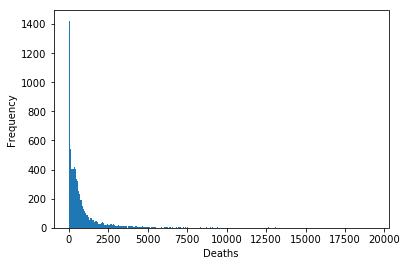

In [10]:
# Looking at the distribution of deaths
deaths = df2[df2['Deaths'] != 0]
import matplotlib.pyplot as plt
plt.hist(deaths.Deaths, bins=300)
plt.xlim()
plt.xlabel('Deaths')
plt.ylabel('Frequency')
plt.show()

/Users/TarjaniAgrawal/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


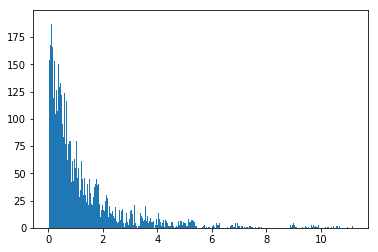

In [11]:
# Getting percentage population as per Crude rate
CR =  df2[df2['Crude Rate'] != 0]
CR['%DeathPerCR'] =  (CR.Deaths / CR['Crude Rate'])
plt.hist(CR['%DeathPerCR'] , bins=500)
plt.xlim()
plt.show()

#### Crude rate is actual cases reported to the hospital and deaths are death due to those cases. Therefore Crude rate can not be higher than deaths, hence Deaths/Crude Rate can not be more than 1. 
#### However here we see that values are way more than 1, therefore to calculate percentage deaths we would use population. 

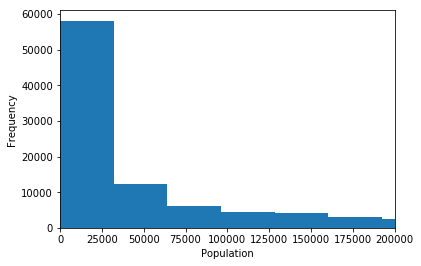

In [12]:
# Looking at distribution of population
Pop =  df2[df2['Population'] != 0]
plt.hist(Pop['Population'], bins=500)
plt.xlim(0, 200000)
plt.xlabel('Population')
plt.ylabel('Frequency')
plt.show()

In [13]:
# Percentage deaths as per population and Crude rate
Pop['%DeathPerPop'] =  (Pop.Deaths / Pop.Population)*100
Pop.describe()

,Deaths,Population,Crude Rate,%DeathPerPop
count,126397.000000,1.263970e+05,126397.000000,126397.000000
mean,54.927482,3.954315e+05,99.264687,0.007652
std,442.125022,1.046089e+06,704.258432,0.052046
min,0.000000,2.400000e+01,0.000000,0.000000
25%,0.000000,8.188000e+03,0.000000,0.000000
50%,0.000000,4.200000e+04,0.000000,0.000000
75%,0.000000,2.813880e+05,0.000000,0.000000
max,19291.000000,1.603210e+07,23110.300000,2.390438


### To categorise the data into three categories ie High Risk, Intermediate Risk, and Low Risk depending on the percantage deaths.¶

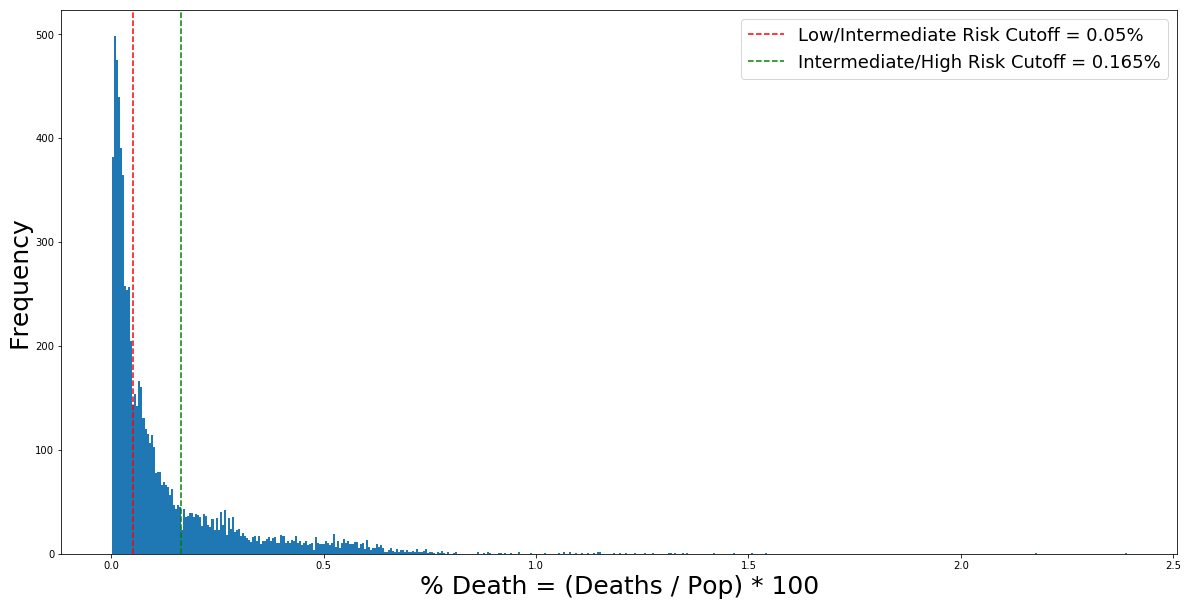

In [15]:
DeathPop = Pop[Pop['%DeathPerPop'] != 0] 
import matplotlib.pyplot as plt
plt.rc('axes', labelsize=25)
plt.rc('legend', fontsize=18) 
plt.figure(figsize=(20,10))
plt.hist(DeathPop['%DeathPerPop'] , bins=500)
plt.axvline(x=0.05, color='r', linestyle='dashed', label='Low/Intermediate Risk Cutoff = 0.05%')
plt.axvline(x=0.165, color='g', linestyle='dashed', label='Intermediate/High Risk Cutoff = 0.165%')
plt.xlabel('% Death = (Deaths / Pop) * 100')
plt.ylabel('Frequency')
plt.legend(loc='best')
plt.xlim()
plt.show()

In [16]:
DeathPop.head()

,State,Cancer Sites,Age Group,Sex,Race,Deaths,Population,Crude Rate,%DeathPerPop
234,Alabama,Brain and Other Nervous System,50-54 years,Male,White,17,117108,14.5,0.014517
240,Alabama,Brain and Other Nervous System,55-59 years,Male,White,110,681331,96.6,0.016145
244,Alabama,Brain and Other Nervous System,60-64 years,Female,White,19,112092,17.0,0.016950
248,Alabama,Brain and Other Nervous System,60-64 years,Male,White,74,392254,75.5,0.018865
252,Alabama,Brain and Other Nervous System,65-69 years,Female,White,34,187027,36.6,0.018179


In [17]:
# Adding RISK column according to the value in %DeathPerPop
def risk(death):
    if death <= 0.05:
        risk = 'LOW'
    elif ((death > 0.05) & (death <=0.165)):
        risk = 'INTERMEDIATE'
    else:
        risk = 'HIGH'
    return risk

DeathPop['Risk']= DeathPop['%DeathPerPop'].apply(risk)
DeathPop.head()


/Users/TarjaniAgrawal/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,State,Cancer Sites,Age Group,Sex,Race,Deaths,Population,Crude Rate,%DeathPerPop,Risk
234,Alabama,Brain and Other Nervous System,50-54 years,Male,White,17,117108,14.5,0.014517,LOW
240,Alabama,Brain and Other Nervous System,55-59 years,Male,White,110,681331,96.6,0.016145,LOW
244,Alabama,Brain and Other Nervous System,60-64 years,Female,White,19,112092,17.0,0.016950,LOW
248,Alabama,Brain and Other Nervous System,60-64 years,Male,White,74,392254,75.5,0.018865,LOW
252,Alabama,Brain and Other Nervous System,65-69 years,Female,White,34,187027,36.6,0.018179,LOW


In [21]:
(DeathPop['Risk'].value_counts()/ len(DeathPop['Risk']))*100

LOW             46.533613
INTERMEDIATE    29.385504
HIGH            24.080882
Name: Risk, dtype: float64

In [145]:
# Dropping the columns Deaths, Population, Crude Rate, %DeathPerPop which not needed for further analysis
data = DeathPop.drop(['Deaths', 'Population', 'Crude Rate', '%DeathPerPop'], axis=1)
data.head()

,State,Cancer Sites,Age Group,Sex,Race,Risk
234,Alabama,Brain and Other Nervous System,50-54 years,Male,White,LOW
240,Alabama,Brain and Other Nervous System,55-59 years,Male,White,LOW
244,Alabama,Brain and Other Nervous System,60-64 years,Female,White,LOW
248,Alabama,Brain and Other Nervous System,60-64 years,Male,White,LOW
252,Alabama,Brain and Other Nervous System,65-69 years,Female,White,LOW


In [146]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7616 entries, 234 to 125939
Data columns (total 6 columns):
State           7616 non-null object
Cancer Sites    7616 non-null object
Age Group       7616 non-null object
Sex             7616 non-null object
Race            7616 non-null object
Risk            7616 non-null object
dtypes: object(6)
memory usage: 416.5+ KB


In [147]:
# Label encoding Risk column
from sklearn.preprocessing import LabelEncoder
lb_make= LabelEncoder()
data['Risk_code'] = lb_make.fit_transform(data.Risk)
data.head()


,State,Cancer Sites,Age Group,Sex,Race,Risk,Risk_code
234,Alabama,Brain and Other Nervous System,50-54 years,Male,White,LOW,2
240,Alabama,Brain and Other Nervous System,55-59 years,Male,White,LOW,2
244,Alabama,Brain and Other Nervous System,60-64 years,Female,White,LOW,2
248,Alabama,Brain and Other Nervous System,60-64 years,Male,White,LOW,2
252,Alabama,Brain and Other Nervous System,65-69 years,Female,White,LOW,2


In [148]:
# Dropping risk column after converting it to labels
data = data.drop(['Risk'], axis=1)
data.head()

,State,Cancer Sites,Age Group,Sex,Race,Risk_code
234,Alabama,Brain and Other Nervous System,50-54 years,Male,White,2
240,Alabama,Brain and Other Nervous System,55-59 years,Male,White,2
244,Alabama,Brain and Other Nervous System,60-64 years,Female,White,2
248,Alabama,Brain and Other Nervous System,60-64 years,Male,White,2
252,Alabama,Brain and Other Nervous System,65-69 years,Female,White,2


In [149]:
# Getting dummies for State, Cancer Sites, Age, Sex and Race
data = pd.get_dummies(data, columns= ['State', 'Cancer Sites', 'Age Group', 'Sex', 'Race']) 
data.columns

Index(['Risk_code', 'State_Alabama', 'State_Alaska', 'State_Arizona',
       'State_Arkansas', 'State_California', 'State_Colorado',
       'State_Connecticut', 'State_Delaware', 'State_District of Columbia',
       'State_Florida', 'State_Georgia', 'State_Hawaii', 'State_Idaho',
       'State_Illinois', 'State_Indiana', 'State_Iowa', 'State_Kansas',
       'State_Kentucky', 'State_Louisiana', 'State_Maine', 'State_Maryland',
       'State_Massachusetts', 'State_Michigan', 'State_Minnesota',
       'State_Mississippi', 'State_Missouri', 'State_Montana',
       'State_Nebraska', 'State_Nevada', 'State_New Hampshire',
       'State_New Jersey', 'State_New Mexico', 'State_New York',
       'State_North Carolina', 'State_North Dakota', 'State_Ohio',
       'State_Oklahoma', 'State_Oregon', 'State_Pennsylvania',
       'State_Rhode Island', 'State_South Carolina', 'State_South Dakota',
       'State_Tennessee', 'State_Texas', 'State_Utah', 'State_Vermont',
       'State_Virginia', 'State_Wa

In [150]:
#Creating X and Y array for dataset 
X= data.drop(['Risk_code'], axis=1).as_matrix()
y= data['Risk_code'].as_matrix()

In [151]:
print(X.shape, y.shape)

(7616, 91) (7616,)


In [153]:
# Train test split data 
from sklearn.model_selection import train_test_split
X_trainlr, X_testlr, y_trainlr, y_testlr = train_test_split(X, y, random_state=5) 
print(X_trainlr.shape)
print(X_testlr.shape)
print(y_trainlr.shape)
print(y_testlr.shape)

(5712, 91)
(1904, 91)
(5712,)
(1904,)


In [156]:
print("\n")
print("X_trainlr:", X_trainlr, type(X_trainlr), X_trainlr.shape, len(X_trainlr))
print("X_testlr", X_testlr, type(X_testlr), X_testlr.shape, len(X_testlr))
print("y_trainlr:", y_trainlr, type(y_trainlr), y_trainlr.shape, len(y_trainlr))
print("y_testlr", y_testlr, type(y_testlr), y_testlr.shape, len(y_testlr))



X_trainlr: [[0 0 0 ..., 0 1 0]
 [0 0 0 ..., 0 1 0]
 [0 0 0 ..., 0 0 1]
 ..., 
 [0 0 0 ..., 0 0 1]
 [0 0 0 ..., 0 1 0]
 [0 0 0 ..., 0 0 1]] <class 'numpy.ndarray'> (5712, 91) 5712
X_testlr [[0 0 0 ..., 0 0 1]
 [0 0 0 ..., 0 1 0]
 [0 0 0 ..., 0 0 1]
 ..., 
 [0 0 1 ..., 0 0 1]
 [0 0 0 ..., 0 0 1]
 [0 0 0 ..., 0 0 1]] <class 'numpy.ndarray'> (1904, 91) 1904
y_trainlr: [2 2 1 ..., 0 0 1] <class 'numpy.ndarray'> (5712,) 5712
y_testlr [2 0 2 ..., 1 2 1] <class 'numpy.ndarray'> (1904,) 1904


In [159]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Instantiate Logistic Regression model
Logreg= LogisticRegression()

# fit the model to training data
Logreg.fit(X_trainlr, y_trainlr)

y_pred_test = Logreg.predict(X_testlr)
print("Accuracy of Logistic Regression on Test data:",accuracy_score(y_pred_test, y_testlr))


y_pred_training = Logreg.predict(X_trainlr)
print("\n")
print("Accuracy of Logistic Regression on Training data",accuracy_score(y_trainlr, y_pred_training))

Accuracy of Logistic Regression on Test data: 0.893382352941


Accuracy of Logistic Regression on Training data 0.903711484594


#### Here accuracy of Training data is 0.903711484594 which is pretty good which also means that there is low bias in the model. Also, accuracy of Test data is 0.893382352941 which is very close to accuracy of training data hence it means it has low variance. Both low bias and low variance are good for the model. 
#### We would try to improve the accuracy for both training and test data by optimizing the hyperparameters of the model. 

In [165]:
# optimizing regularization parameter C which is Inverse of regularization strength; 
#must be a positive float. 
#Smaller values specify stronger regularization.
Cs = [10, 100, 1000, 10000,100000, 1000000]
from sklearn.model_selection import GridSearchCV

params = {'C':Cs}
gs= GridSearchCV(Logreg, param_grid= params, cv=5)
gs.fit(X_trainlr, y_trainlr)
print(gs.cv_results_)
print(gs.best_estimator_)
print(gs.best_score_)

{'split0_test_score': array([ 0.91870629,  0.92307692,  0.92132867,  0.9222028 ,  0.9222028 ,
        0.9222028 ]), 'split1_test_score': array([ 0.90297203,  0.90646853,  0.91083916,  0.91083916,  0.91083916,
        0.91083916]), 'split2_test_score': array([ 0.9290718 ,  0.9352014 ,  0.93695271,  0.93695271,  0.93695271,
        0.93695271]), 'split3_test_score': array([ 0.91411043,  0.92199825,  0.92550394,  0.92550394,  0.92550394,
        0.92550394]), 'split4_test_score': array([ 0.90622261,  0.91235758,  0.91586328,  0.91761613,  0.91761613,
        0.91761613]), 'mean_test_score': array([ 0.91421569,  0.91981793,  0.92209384,  0.92261905,  0.92261905,
        0.92261905]), 'std_test_score': array([ 0.00928698,  0.00985897,  0.00892779,  0.00869283,  0.00869283,
        0.00869283]), 'rank_test_score': array([6, 5, 4, 1, 1, 1], dtype=int32), 'split0_train_score': array([ 0.93345009,  0.93848511,  0.93914186,  0.93936077,  0.93936077,
        0.93936077]), 'split1_train_score': ar

In [174]:
y_pred_train_gs= gs.predict(X_trainlr)
y_pred_test_gs = gs.predict(X_testlr)

print("Accuracy of Tuned L2 Logistic Regression on Test data:",accuracy_score(y_pred_test_gs, y_testlr))

print("Accuracy of Tuned L2 Logistic Regression on Training data",accuracy_score(y_trainlr, y_pred_train_gs))

Accuracy of Tuned L2 Logistic Regression on Test data: 0.920693277311
Accuracy of Tuned L2 Logistic Regression on Training data 0.9375


#### We improved the accuracy of both training and test data by optimizing the regularisation parameter C. New more improved accuracy for training data is 0.9375 and test data is 0.920693277311.  
#### By default scikit learn uses L2 regularisation model. Here we have optimized L2 regularization (Ridge) which forces the parameters to be relatively small, therefore the bigger the penalization, the smaller (and the more robust) the coefficients are. 
#### We can also try using L1 regularisation model to see if that works better. 

In [175]:
#instantiate the model with L1
Logregl1= LogisticRegression(penalty='l1')

# fit the model to training data
Logregl1.fit(X_trainlr, y_trainlr)

y_pred_test_l1 = Logregl1.predict(X_testlr)
print("Accuracy of L1 Logistic Regression on Test data:",accuracy_score(y_pred_test_l1, y_testlr))

y_pred_train_l1 = Logregl1.predict(X_trainlr)
print("Accuracy of L1 Logistic Regression on Training data",accuracy_score(y_trainlr, y_pred_train_l1))

Accuracy of L1 Logistic Regression on Test data: 0.918067226891
Accuracy of L1 Logistic Regression on Training data 0.926645658263


#### Looks like using L1 penalty without tuning the hyperparameter, the model already performs better with Test accuracy of  0.918067226891 and training accuracy of 0.926820728291 as compared to untuned L2 regularised model which had Test data accuracy of 0.893382352941 and Training accuracy of 0.903711484594. 
#### Lets tune the hyperparameter for this model.

In [171]:
# tuning the hyperparameter C for l1 regularised model
Cs = [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
from sklearn.model_selection import GridSearchCV

params = {'C':Cs}
gsl1= GridSearchCV(Logregl1, param_grid= params, cv=5)
gsl1.fit(X_trainlr, y_trainlr)
print(gsl1.best_estimator_)
print(gsl1.best_score_)

LogisticRegression(C=10000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
0.922794117647


In [176]:
y_pred_train_gsl1= gsl1.predict(X_trainlr)
y_pred_test_gsl1 = gsl1.predict(X_testlr)

print("Accuracy of Tuned L1 Logistic Regression on Test data:",accuracy_score(y_pred_test_gsl1, y_testlr))

print("Accuracy of Tuned L1 Logistic Regression on Training data",accuracy_score(y_trainlr, y_pred_train_gsl1))

Accuracy of Tuned L1 Logistic Regression on Test data: 0.921218487395
Accuracy of Tuned L1 Logistic Regression on Training data 0.9375


#### After tuning the hyperparameter for L1 regularised model we found that accuracy of training data was exactly same as accuracy for training data with tuned L2 regularised model which is 0.9375. However, the model performs slightly better on Test data with tuned L1 Regularised model with accuracy of 0.921218487395 as compared to tuned L2 regularised model with test accuracy of 0.920693277311. 

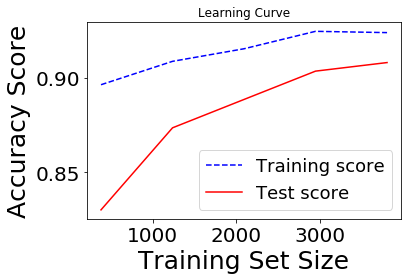

In [199]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(Logregl1, 
                                                        X_trainlr, 
                                                        y_trainlr,
                                                        scoring='accuracy')
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
plt.plot(train_sizes, train_mean, '--', color="b",  label="Training score")
plt.plot(train_sizes, test_mean, color="r", label="Test score")
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [198]:
from sklearn.metrics import classification_report
print("Training Classification Report:")
print(classification_report(y_trainlr, y_pred_train_gsl1))

print("Test Classification Report:")
print(classification_report(y_pred_test_gsl1, y_testlr))

Training Classification Report:
             precision    recall  f1-score   support

          0       0.93      0.96      0.95      1362
          1       0.93      0.85      0.89      1687
          2       0.94      0.98      0.96      2663

avg / total       0.94      0.94      0.94      5712

Test Classification Report:
             precision    recall  f1-score   support

          0       0.96      0.91      0.94       501
          1       0.82      0.90      0.86       503
          2       0.96      0.94      0.95       900

avg / total       0.92      0.92      0.92      1904



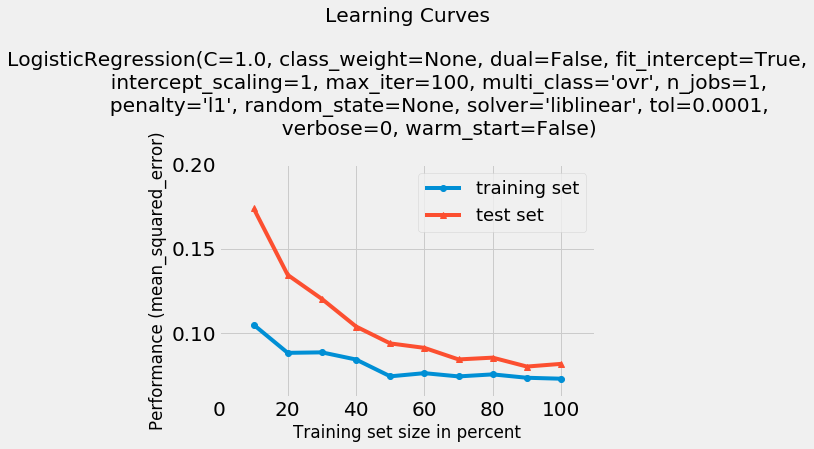

In [181]:
# Another way to plot learning curve
from mlxtend.plotting import plot_learning_curves
plot_learning_curves(X_trainlr, y_trainlr, X_testlr, y_testlr, Logregl1, scoring= 'mean_squared_error')
plt.show()